# Preliminary

## Import Library

In [29]:
# load data and process data
import numpy as np
import pandas as pd
import warnings
import json
import math
import joblib

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing & fe
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# mode selection and evaluation metrics
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer
)

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
import xgboost as xgb
import lightgbm as lgb

# others
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

%matplotlib inline

# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [30]:
# define path data
path_data = '/content/drive/MyDrive/Dibimbing_DS/final_project_DS/dataset/processed/'


# load train_set
train_set_processed = joblib.load(path_data + 'train_set_processed_final.joblib')
train_set_processed_scaled = joblib.load(path_data + 'train_set_processed_scaled_final.joblib')

# load test_set
test_set_processed = joblib.load(path_data + 'test_set_processed_final.joblib')
test_set_processed_scaled = joblib.load(path_data + 'test_set_processed_scaled_final.joblib')

## Splitting Data

In [31]:
# split target data
y_train = train_set_processed['bankrupt']
y_test = test_set_processed['bankrupt']


# split data no scaling
X_train = train_set_processed.drop(columns='bankrupt')
X_test = test_set_processed.drop(columns='bankrupt')

# split data scaling
X_train_scaled = train_set_processed_scaled.drop(columns='bankrupt')
X_test_scaled = test_set_processed_scaled.drop(columns='bankrupt')

## Understanding & Validation Data

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   operating gross margin                   5455 non-null   float64
 1   persistent eps in the last four seasons  5455 non-null   float64
 2   operating profit per person              5455 non-null   float64
 3   net income to total assets               5455 non-null   float64
 4   net income to stockholder's equity       5455 non-null   float64
 5   cash flow rate                           5455 non-null   float64
 6   cash flow per share                      5455 non-null   float64
 7   current ratio                            5455 non-null   float64
 8   quick ratio                              5455 non-null   float64
 9   working capital to total assets          5455 non-null   float64
 10  quick assets/total assets                5455 non-nu

In [33]:
X_train.head()

,operating gross margin,persistent eps in the last four seasons,operating profit per person,net income to total assets,net income to stockholder's equity,cash flow rate,cash flow per share,current ratio,quick ratio,working capital to total assets,quick assets/total assets,cash/total assets,cash flow to total assets,cfo to assets,cash flow to equity,current liability to current assets,total debt/total net worth,long-term fund suitability ratio (a),borrowing dependency,current liability to assets,liability-assets flag,equity to liability,total asset turnover,total expense/assets,after-tax net profit growth rate,net value growth rate,total asset return growth rate ratio,net value per share (a),working capital/equity
318,0.598524,0.221424,0.392958,0.806631,0.840649,0.466210,0.321214,0.011323,0.005382,0.788318,0.146419,0.007823,0.635412,0.586432,0.313704,0.025832,0.002071,0.005227,0.369637,0.048699,0,0.070742,0.142429,0.012305,0.690475,0.000456,0.264398,0.200919,0.733835
5796,0.599302,0.249031,0.424617,0.827723,0.843248,0.465192,0.330268,0.011338,0.009921,0.853149,0.746200,0.035033,0.649119,0.611292,0.315824,0.025795,0.010805,0.005774,0.375230,0.132502,0,0.022433,0.389805,0.017890,0.689580,0.000470,0.264301,0.195946,0.741153
4454,0.606740,0.230689,0.400828,0.828627,0.841982,0.470258,0.323477,0.017457,0.016431,0.835867,0.464273,0.237578,0.676644,0.606997,0.318599,0.016805,0.002555,0.005515,0.369637,0.051387,0,0.059856,0.122939,0.011238,0.689443,0.000446,0.264059,0.187898,0.736437
2225,0.595375,0.216413,0.393162,0.797846,0.840248,0.463531,0.326059,0.009404,0.005714,0.838999,0.795756,0.092410,0.674861,0.599958,0.321577,0.030998,0.012419,0.007815,0.372887,0.178165,0,0.020864,0.188906,0.009103,0.689399,0.000443,0.263955,0.183052,0.740521
3249,0.664495,0.202609,0.381832,0.756573,0.838115,0.437313,0.313221,0.064863,0.063631,0.910421,0.666841,0.035042,0.622541,0.522352,0.312560,0.004359,0.000461,0.015991,0.369637,0.018513,0,0.233952,0.010495,0.037158,0.686752,0.000641,0.262649,0.162151,0.738884


In [34]:
y_train.value_counts()

,count
bankrupt,
0,5279
1,176


In [35]:
y_test.value_counts()

,count
bankrupt,
0,1320
1,44


Berdasarkan dokumentasi memang fitur imbalnce di mana total y di data tanpa splitting ada 220. Hasil penjumlahan di set train dan test akan berjumlah 220. Jadii ni sudah tepat.

In [36]:
# print the result
# check shape
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

# check shape data scale
print(f'Shape of X_train_scaled: {X_train_scaled.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test_scaled: {X_test_scaled.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (5455, 29)
Shape of y_train: (5455,)
Shape of X_test: (1364, 29)
Shape of y_test: (1364,)
Shape of X_train_scaled: (5455, 29)
Shape of y_train: (5455,)
Shape of X_test_scaled: (1364, 29)
Shape of y_test: (1364,)


Pada EDA juga ditemukan fitur-fitur yang tidak invalid atau tidak masuk secara nilai, langkah atau metode yang dilakukan pada proses EDA dan processing adalah menghapus fitur tersebut jika sudah terlalu rusak atau melakukan capping dengan persentil ke 99 di set train.

Maka dari itu, hasil preprocessing memberikan 76 fitur utnuk dimodelkan. Perlu dipahami juga bahwa fitur2 di atas memiliki multikolinearias. Mengingat banyaknya fitur dan waktu yang terbatas, pemilihan model akan diserahkan pada model terbaik yang akan dipilih.

Adapun, berdasarkan hasi eksplorasi dan penelitian terkait, setidaknya ada 7 variabel yang kemungkinan memiliki pengaruh terhadap kebangkrutan perusahaan, di antaranya

1. roa(a) before interest and % after tax (Profitabilitas)
2. net worth/assets (Struktur Modal / Solvabilitas)
3. working capital to total assets (Likuiditas)
4. cash flow rate (Arus Kas)
5. net income to stockholder's equity (ROE - Profitabilitas)
6. debt ratio % (Leverage)
7. total asset turnover (Efisiensi)

# Modelling

In [37]:
# create function for modelling data without resample
def get_best_models_cv(X: pd.DataFrame, y: pd.Series, models: dict, sort_by: str, n_splits: int = 5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'])

    for name, model in models.items():
        accuracy_scores = []
        auc_scores = []
        recall_scores = []
        precision_scores = []
        f1_scores = []

        for train_index, val_index in skf.split(X, y):
            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_val_fold)

            # to handle cases where the model fails predict_proba
            if hasattr(model, 'predict_proba'):
                try:
                    y_proba = model.predict_proba(X_val_fold)[:, 1]
                    auc_scores.append(roc_auc_score(y_val_fold, y_proba))
                except (ValueError, AttributeError):
                    auc_scores.append(0.0)
            else:
                auc_scores.append(0.0)

            accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
            recall_scores.append(recall_score(y_val_fold, y_pred))
            precision_scores.append(precision_score(y_val_fold, y_pred))
            f1_scores.append(f1_score(y_val_fold, y_pred))

        results.loc[len(results)] = [
            name,
            pd.Series(accuracy_scores).mean(),
            pd.Series(auc_scores).mean(),
            pd.Series(recall_scores).mean(),
            pd.Series(precision_scores).mean(),
            pd.Series(f1_scores).mean()
        ]

    return results.sort_values(by=sort_by, ascending=False).reset_index(drop=True)

Fungsi di atas (`get_best_models_cv`) untuk memodelkan data **tanpa melakukan resampling atau SMOTE**.

In [38]:
# create function for modelling data with resample (SMOTE)
def get_best_models_cv_SMOTE(X: pd.DataFrame, y: pd.Series, models: dict, sort_by: str, n_splits: int = 5):
    smote = SMOTE(random_state=42)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'])

    for name, model in models.items():
        accuracy_scores = []
        auc_scores = []
        recall_scores = []
        precision_scores = []
        f1_scores = []

        for train_index, val_index in skf.split(X, y):
            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

            # fit SMOTE on train set
            X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train_fold, y_train_fold)

            # fit mode
            model.fit(X_train_SMOTE, y_train_SMOTE)
            y_pred = model.predict(X_val_fold)

            # to handle cases where the model fails predict_proba
            if hasattr(model, 'predict_proba'):
                try:
                    y_proba = model.predict_proba(X_val_fold)[:, 1]
                    auc_scores.append(roc_auc_score(y_val_fold, y_proba))
                except (ValueError, AttributeError):
                    auc_scores.append(0.0)
            else:
                auc_scores.append(0.0)

            accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
            recall_scores.append(recall_score(y_val_fold, y_pred))
            precision_scores.append(precision_score(y_val_fold, y_pred))
            f1_scores.append(f1_score(y_val_fold, y_pred))

        results.loc[len(results)] = [
            name,
            pd.Series(accuracy_scores).mean(),
            pd.Series(auc_scores).mean(),
            pd.Series(recall_scores).mean(),
            pd.Series(precision_scores).mean(),
            pd.Series(f1_scores).mean()
        ]

    return results.sort_values(by=sort_by, ascending=False).reset_index(drop=True)

Fungsi di atas (`get_best_models_cv_SMOTE`) untuk memodelkan data yang **melakukan resampling atau SMOTE.**

In [39]:
# intialize model
models = {
    'gbc': GradientBoostingClassifier(random_state=42),
    'lightgbm': lgb.LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1),
    'xgb': xgb.XGBClassifier(random_state=42, n_jobs=-1),
    'rf': RandomForestClassifier(random_state=42, n_jobs=-1),
    'et': ExtraTreesClassifier(random_state=42, n_jobs=-1),
    'dt': DecisionTreeClassifier(random_state=42),
    'knn': KNeighborsClassifier(n_jobs=-1),
    'ada': AdaBoostClassifier(random_state=42),
    'lr': LogisticRegression(random_state=42, solver='liblinear', n_jobs=-1),
    'svm': SVC(random_state=42, probability=True),
}

# Data without Scaled

## Compare Model

### Without Resamping

Metrik yang akan diperhatikan adalah F1 score karena data asli tidak seimbang. Masih terkati ketidakseimbangan data, n_split didefinisikan lebih besar dibandingkan default karena untuk memastikan hasil semakin kuat atau bukan merupakan sebuah kebetulan.

In [40]:
experiment_with_data = get_best_models_cv(X_train,
                                          y_train,
                                          models,
                                          sort_by='F1',
                                          n_splits=10)

In [41]:
experiment_with_data

,Model,Accuracy,AUC,Recall,Prec.,F1
0,xgb,0.967551,0.932098,0.245752,0.544268,0.317322
1,gbc,0.967186,0.931589,0.245098,0.526105,0.316124
2,lightgbm,0.969020,0.933023,0.200000,0.578929,0.290050
3,knn,0.969753,0.728056,0.194118,0.585238,0.284886
4,dt,0.951051,0.631322,0.289542,0.272415,0.278116
5,ada,0.964801,0.924793,0.205229,0.393864,0.260349
6,et,0.969385,0.931721,0.148039,0.729048,0.229706
7,rf,0.969019,0.915630,0.136928,0.602857,0.213886
8,lr,0.967553,0.904693,0.011111,0.066667,0.019048
9,svm,0.967737,0.854458,0.000000,0.000000,0.000000


### SMOTE

In [42]:
experiment_with_data_SMOTE = get_best_models_cv_SMOTE(X_train,
                                                      y_train,
                                                      models,
                                                      sort_by='F1',
                                                      n_splits=10)

In [43]:
experiment_with_data_SMOTE

,Model,Accuracy,AUC,Recall,Prec.,F1
0,et,0.958019,0.937187,0.523203,0.386139,0.440031
1,xgb,0.952519,0.930655,0.523529,0.344317,0.412044
2,rf,0.949034,0.926540,0.552941,0.323652,0.404423
3,lightgbm,0.949034,0.928237,0.547386,0.326954,0.401777
4,gbc,0.909808,0.920940,0.739869,0.227279,0.346037
5,ada,0.876987,0.921988,0.801634,0.185056,0.299273
6,dt,0.926485,0.712960,0.484641,0.212942,0.293528
7,lr,0.847101,0.916120,0.840196,0.157469,0.264780
8,knn,0.887983,0.801577,0.613725,0.168580,0.263462
9,svm,0.835922,0.918619,0.852288,0.148516,0.252635


### Comapre Result of Models

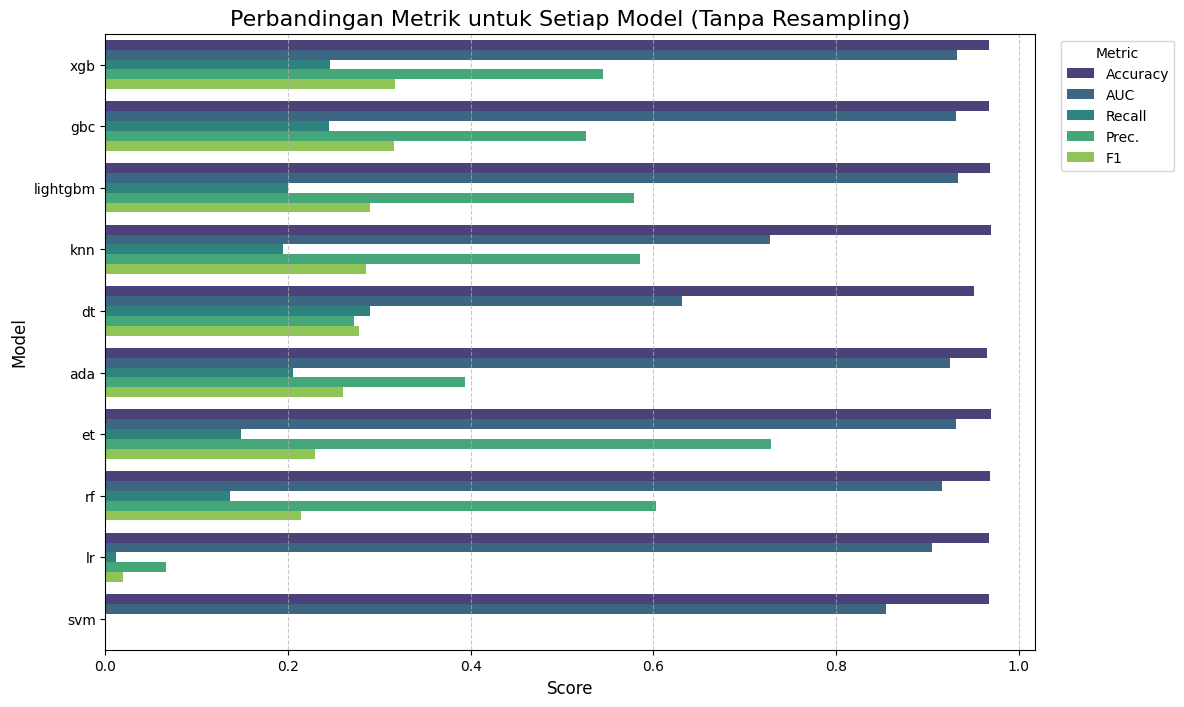

In [44]:
# visualize result experiment in data no SMOTE
melted_results = pd.melt(experiment_with_data,
                         id_vars=['Model'],
                         value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'],
                         var_name='Metric',
                         value_name='Score')

# create stacked/group bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results, y='Model', x='Score', hue='Metric', palette='viridis')
plt.title('Perbandingan Metrik untuk Setiap Model (Tanpa Resampling)', fontsize=16)

# labelling
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# create legend
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

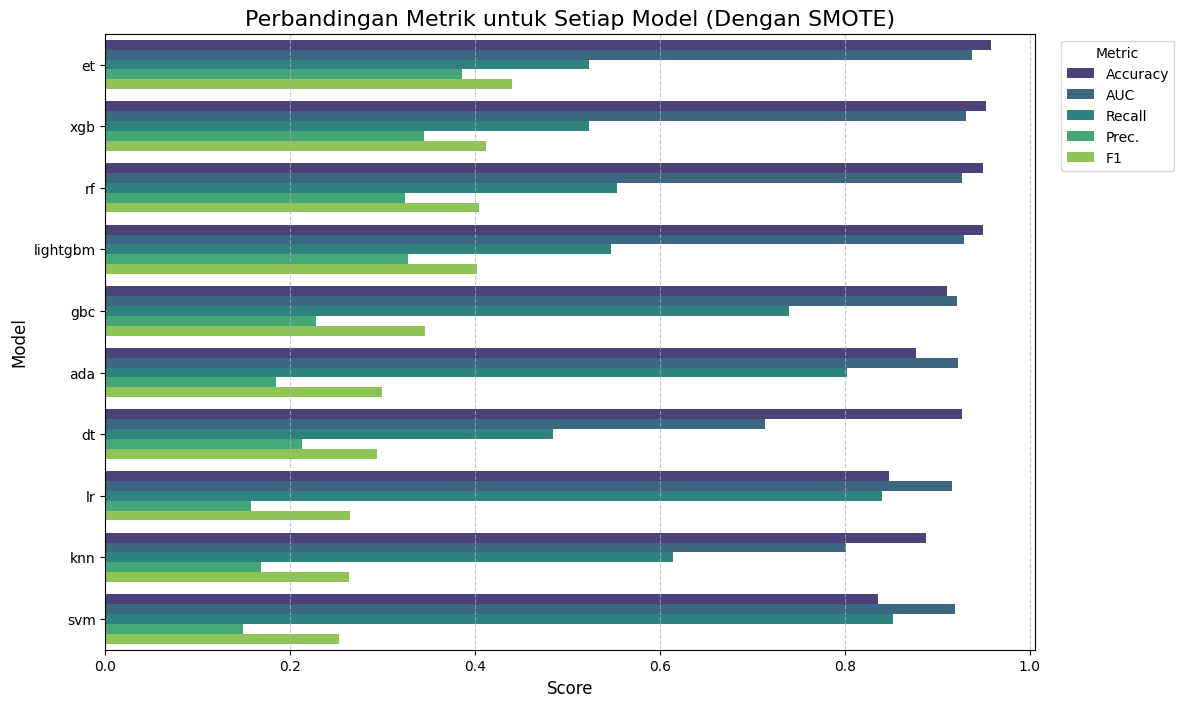

In [45]:
# visualize result experiment in data no SMOTE
melted_results_SMOTE = pd.melt(experiment_with_data_SMOTE,
                         id_vars=['Model'],
                         value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'],
                         var_name='Metric',
                         value_name='Score')

# create stacked/group bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results_SMOTE, y='Model', x='Score', hue='Metric', palette='viridis')
plt.title('Perbandingan Metrik untuk Setiap Model (Dengan SMOTE)', fontsize=16)

# labelling
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# create legend
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Data with Scaled

## FIt Model

### Without Resampling

In [46]:
experiment_with_data_scaled = get_best_models_cv(X_train_scaled,
                                                 y_train,
                                                 models,
                                                 sort_by='F1',
                                                 n_splits=10)

In [47]:
experiment_with_data_scaled

,Model,Accuracy,AUC,Recall,Prec.,F1
0,xgb,0.967734,0.930367,0.250980,0.541761,0.325685
1,lightgbm,0.970118,0.935871,0.222549,0.669859,0.320118
2,gbc,0.967186,0.931589,0.245098,0.526105,0.316124
3,dt,0.950684,0.631133,0.289542,0.270515,0.277096
4,ada,0.964801,0.924793,0.205229,0.393864,0.260349
5,lr,0.966085,0.905861,0.181699,0.446667,0.253193
6,et,0.969385,0.931748,0.148039,0.729048,0.229706
7,rf,0.968836,0.915689,0.136928,0.552857,0.213360
8,knn,0.965718,0.743625,0.129412,0.452619,0.196860
9,svm,0.968287,0.852687,0.017320,0.300000,0.032749


### SMOTE

In [48]:
experiment_with_data_scaled_SMOTE = get_best_models_cv_SMOTE(X_train_scaled,
                                                             y_train,
                                                             models,
                                                             sort_by='F1',
                                                             n_splits=10)

In [49]:
experiment_with_data_scaled_SMOTE

,Model,Accuracy,AUC,Recall,Prec.,F1
0,et,0.956186,0.931659,0.540850,0.374864,0.440362
1,lightgbm,0.947935,0.925939,0.524837,0.312291,0.387951
2,rf,0.947570,0.925475,0.530719,0.307670,0.385418
3,xgb,0.949770,0.916040,0.501961,0.312583,0.382611
4,gbc,0.906137,0.919991,0.705556,0.212386,0.324861
5,ada,0.878640,0.924814,0.812418,0.187050,0.303278
6,lr,0.863602,0.906309,0.823856,0.171407,0.283107
7,knn,0.892755,0.814350,0.611765,0.174504,0.270641
8,dt,0.918970,0.689968,0.445098,0.181808,0.255739
9,svm,0.844357,0.912768,0.818301,0.151267,0.254893


### Compare Result of Models

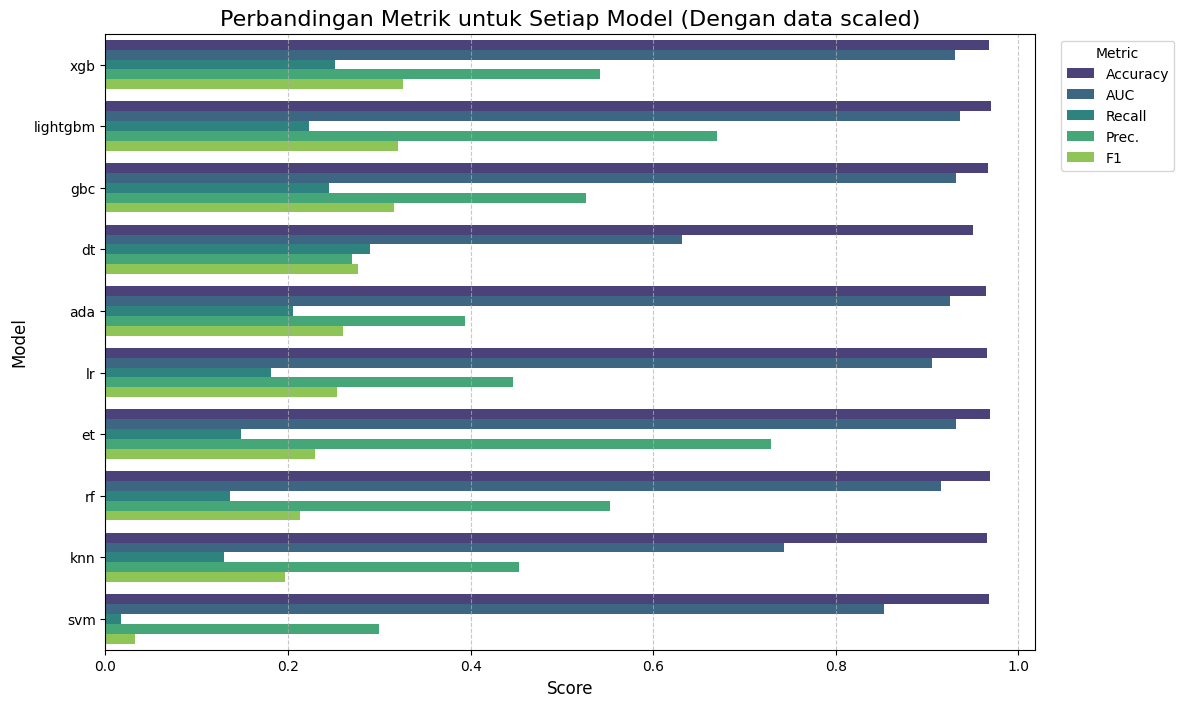

In [50]:
# visualize result experiment in data scaled
melted_results_scaled = pd.melt(experiment_with_data_scaled,
                         id_vars=['Model'],
                         value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'],
                         var_name='Metric',
                         value_name='Score')

# create stacked/group bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results_scaled, y='Model', x='Score', hue='Metric', palette='viridis')
plt.title('Perbandingan Metrik untuk Setiap Model (Dengan data scaled)', fontsize=16)

# labelling
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# create legend
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

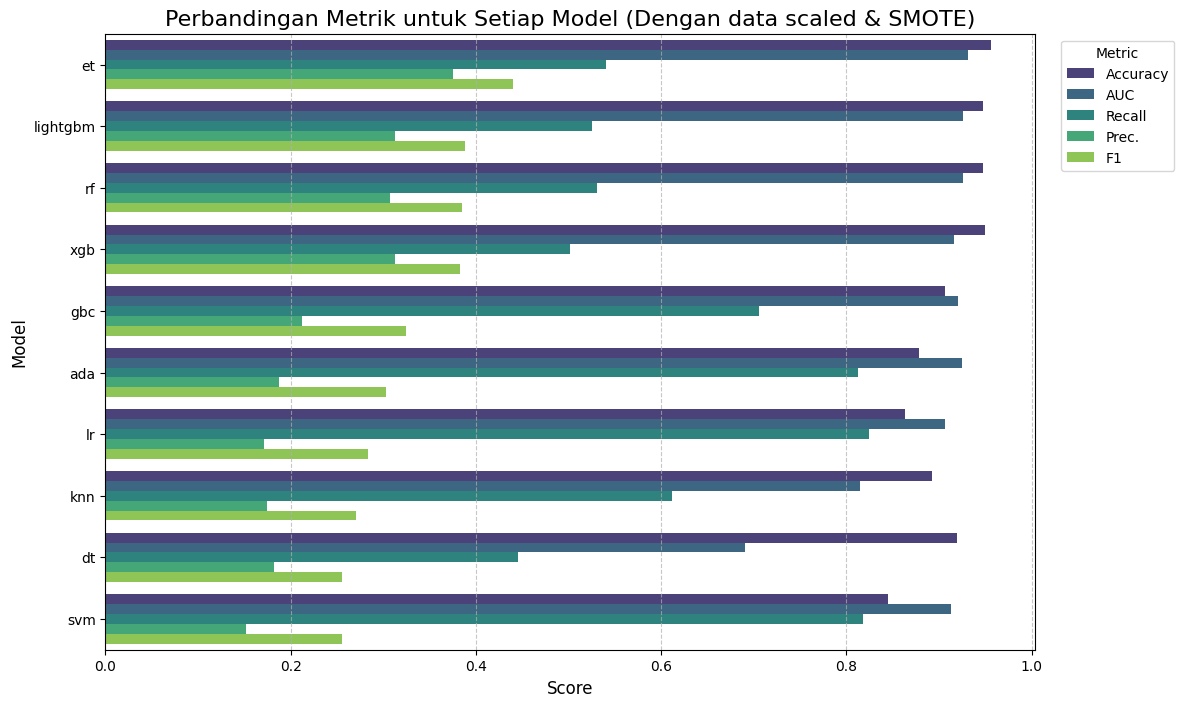

In [51]:
# visualize result experiment in data scaled & SMOTE
melted_results_scaled_SMOTE = pd.melt(experiment_with_data_scaled_SMOTE,
                              id_vars=['Model'],
                              value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'],
                              var_name='Metric',
                              value_name='Score')

# create stacked/group bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results_scaled_SMOTE, y='Model', x='Score', hue='Metric', palette='viridis')
plt.title('Perbandingan Metrik untuk Setiap Model (Dengan data scaled & SMOTE)', fontsize=16)

# labelling
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# create legend
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Evaluation The (Candidate) Best Model

Berdasarkan hasil perbandingan berbagai model, bahwa model dengan SMOTE, baik dengan scale dan tanpa scale memberikan hasil yang cukup baik di sisi Recall dan F1-score. Pemilihan dua metrik ini didasarkan pada alasan, bahwa
* Satu perusahaan bankrupt itu sangat berarti, kesalahan prediksi perusahaan yang tidak bankrupt padahal bankrupt dampaknya sangat besar. Terlebih, sifatnya yang preventif atau pencegahan, recall dipilih untuk mengurangi potensi kecolongan perusahaan yang sebenarnya bankrupt diprediksi tidak bankrupt
* Sementara itu, F1-score dipilih sebagai metrik penyeimbang karena bakal membagi recall dan precision (mengukur keakuratan prediksi)

Berdasarkan hasil di atas, fit dengan SMOTE adalah yang terbaik untuk menghasilkan dua metrik yang ditentukan di atas. Adapun, untuk kandidat model terbaik dimiliki oleh Gradient Boosting Classifier (gbc) dan AdaBoost Classifier (ada). Hal ini karena nilai Recall dan F1 scorenya tinggi dan ada potensi untuk dilakukan tuning, meskipun terlihat seperti ada trade-off dengan metrik Precision.

Selain dua model ini, ada model lain yang akan dipertimbangkan dalam evaluasi sebagai kandidat model yang akan dipilih, yakni ExtraTrees (et), Random Forest (rf), dan XGBoost
* F1-score terbilang lebih tinggi, baik di data scale atau tidak, di antara model lainnya.
* Recall dan F1-score cukup seimbang, meskipun tidak sebagus hasil dari AdaBoost dan GradientBoost.

Note: lightgbm tidak dipilih walaupun sedikit lebih baik di data scaled, namun secara potensi overfitting lebih tinggi. Lagi pula, secara metrik dan score nilainya juga tidak jauh berbeda dengan model yang dipilih di atas, bahkan lebih baik dibandingkan lightgbm


Selanjutnya, 5 kandidat model ini akan di-*fit*, validasi, dan evaluasi hasilnya.

In [64]:
# define candidate model
gbc_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
et_model = ExtraTreesClassifier(random_state=42, n_jobs=-1)
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

## Validation the Result

In [53]:
def single_model_cv_report_smote(model, X_train, y_train, n_splits=5):
    # initialize SMOTE and StratifiedKFoold
    smote = SMOTE(random_state=42)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = pd.DataFrame(columns=['Fold', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'])

    all_metrics = {metric: [] for metric in ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1']}

    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Resample Data
        X_train_smoted, y_train_smoted = smote.fit_resample(X_train_fold, y_train_fold)

        # Fit the model on SMOTE-d data
        model.fit(X_train_smoted, y_train_smoted)

        # Predict on the original validation fold
        y_pred = model.predict(X_val_fold)

        # Calculate metrics (logic remains the same)
        if hasattr(model, 'predict_proba'):
            try:
                y_proba = model.predict_proba(X_val_fold)[:, 1]
                auc = roc_auc_score(y_val_fold, y_proba)
            except (ValueError, AttributeError):
                auc = np.nan
        else:
            auc = np.nan

        acc = accuracy_score(y_val_fold, y_pred)
        rec = recall_score(y_val_fold, y_pred, zero_division=0)
        prec = precision_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)

        # Store all per-fold metrics
        all_metrics['Accuracy'].append(acc)
        all_metrics['AUC'].append(auc)
        all_metrics['Recall'].append(rec)
        all_metrics['Prec.'].append(prec)
        all_metrics['F1'].append(f1)

        # Store per-fold results in DataFrame
        results.loc[len(results)] = [f"Fold {fold}", acc, auc, rec, prec, f1]

    # Add the mean row using the stored metrics
    results.loc[len(results)] = ['Mean',
                                 pd.Series(all_metrics['Accuracy']).mean(),
                                 pd.Series(all_metrics['AUC']).mean(skipna=True),
                                 pd.Series(all_metrics['Recall']).mean(),
                                 pd.Series(all_metrics['Prec.']).mean(),
                                 pd.Series(all_metrics['F1']).mean()]

    return results

### Data Not Scaled

##### Gradient Boosting (gbc)

In [54]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(gbc_model,
                             X_train,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.912088,0.944655,0.833333,0.250000,0.384615
1,Fold 1,0.924908,0.876684,0.555556,0.232558,0.327869
2,Fold 2,0.886447,0.950337,0.777778,0.194444,0.311111
3,Fold 3,0.912088,0.942445,0.833333,0.250000,0.384615
4,Fold 4,0.910256,0.943708,0.611111,0.207547,0.309859
5,Fold 5,0.913761,0.837233,0.647059,0.211538,0.318841
6,Fold 6,0.889908,0.910094,0.882353,0.205479,0.333333
7,Fold 7,0.904587,0.936497,0.823529,0.222222,0.350000
8,Fold 8,0.926606,0.953877,0.823529,0.274510,0.411765
9,Fold 9,0.917431,0.913873,0.611111,0.224490,0.328358


Hasil metrik/score sama denga nilai mean di section `Compare Result of Models` SMOTE untuk data not scaled. Dengan kata lain, nilainya valid

#### AdaBoost Classifier (ada)

In [55]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(ada_model,
                             X_train,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.888278,0.948127,0.833333,0.205479,0.329670
1,Fold 1,0.912088,0.938237,0.833333,0.250000,0.384615
2,Fold 2,0.840659,0.928399,0.888889,0.158416,0.268908
3,Fold 3,0.895604,0.931976,0.833333,0.217391,0.344828
4,Fold 4,0.882784,0.935501,0.777778,0.189189,0.304348
5,Fold 5,0.880734,0.856618,0.647059,0.157143,0.252874
6,Fold 6,0.829358,0.907531,0.882353,0.141509,0.243902
7,Fold 7,0.880734,0.945354,0.882353,0.192308,0.315789
8,Fold 8,0.878899,0.946580,0.882353,0.189873,0.312500
9,Fold 9,0.880734,0.881562,0.555556,0.149254,0.235294


Nilai mean juga valid

#### ExtraTreesClassifier

In [56]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(et_model,
                             X_train,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.965201,0.951757,0.777778,0.482759,0.595745
1,Fold 1,0.963370,0.953598,0.444444,0.444444,0.444444
2,Fold 2,0.956044,0.958228,0.666667,0.400000,0.500000
3,Fold 3,0.959707,0.943182,0.333333,0.375000,0.352941
4,Fold 4,0.954212,0.951126,0.500000,0.360000,0.418605
5,Fold 5,0.952294,0.867313,0.529412,0.333333,0.409091
6,Fold 6,0.957798,0.939171,0.470588,0.363636,0.410256
7,Fold 7,0.959633,0.957888,0.647059,0.407407,0.500000
8,Fold 8,0.961468,0.956607,0.529412,0.409091,0.461538
9,Fold 9,0.950459,0.893000,0.333333,0.285714,0.307692


Nilai mean juga valid

#### XGBoost

In [65]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(xgb_model,
                             X_train,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.959707,0.944129,0.611111,0.423077,0.500000
1,Fold 1,0.943223,0.906355,0.166667,0.157895,0.162162
2,Fold 2,0.943223,0.959070,0.611111,0.314286,0.415094
3,Fold 3,0.956044,0.955492,0.500000,0.375000,0.428571
4,Fold 4,0.970696,0.960017,0.722222,0.541667,0.619048
5,Fold 5,0.943119,0.859848,0.470588,0.266667,0.340426
6,Fold 6,0.946789,0.929813,0.588235,0.312500,0.408163
7,Fold 7,0.950459,0.942291,0.647059,0.343750,0.448980
8,Fold 8,0.957798,0.960227,0.529412,0.375000,0.439024
9,Fold 9,0.954128,0.889311,0.388889,0.333333,0.358974


#### Random Forest (rf)

In [58]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(rf_model,
                             X_train,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.959707,0.958070,0.777778,0.437500,0.560000
1,Fold 1,0.952381,0.926242,0.222222,0.250000,0.235294
2,Fold 2,0.950549,0.946181,0.555556,0.344828,0.425532
3,Fold 3,0.948718,0.933186,0.500000,0.321429,0.391304
4,Fold 4,0.952381,0.938763,0.555556,0.357143,0.434783
5,Fold 5,0.941284,0.848262,0.529412,0.272727,0.360000
6,Fold 6,0.943119,0.941232,0.588235,0.294118,0.392157
7,Fold 7,0.946789,0.943795,0.764706,0.342105,0.472727
8,Fold 8,0.954128,0.953431,0.647059,0.366667,0.468085
9,Fold 9,0.941284,0.876239,0.388889,0.250000,0.304348


### Data Scaled

#### Gradient Boosting Classifier (gbc)

In [59]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(gbc_model,
                             X_train_scaled,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.908425,0.951284,0.833333,0.241935,0.375000
1,Fold 1,0.923077,0.860269,0.500000,0.214286,0.300000
2,Fold 2,0.895604,0.949285,0.777778,0.208955,0.329412
3,Fold 3,0.919414,0.951389,0.888889,0.275862,0.421053
4,Fold 4,0.906593,0.924453,0.611111,0.200000,0.301370
5,Fold 5,0.899083,0.860740,0.647059,0.183333,0.285714
6,Fold 6,0.882569,0.931261,0.823529,0.186667,0.304348
7,Fold 7,0.900917,0.940174,0.823529,0.215385,0.341463
8,Fold 8,0.917431,0.943850,0.705882,0.230769,0.347826
9,Fold 9,0.908257,0.887202,0.444444,0.166667,0.242424


Hasil metrik/score sama denga nilai mean di section `Compare Result of Models` SMOTE untuk data scaled. Dengan kata lain, nilainya valid

#### AdaBoost Classifier (ada)

In [60]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(ada_model,
                             X_train_scaled,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.884615,0.950389,0.888889,0.207792,0.336842
1,Fold 1,0.904762,0.929135,0.777778,0.225806,0.350000
2,Fold 2,0.853480,0.931239,0.833333,0.163043,0.272727
3,Fold 3,0.871795,0.923453,0.888889,0.190476,0.313725
4,Fold 4,0.897436,0.951126,0.833333,0.220588,0.348837
5,Fold 5,0.882569,0.861408,0.647059,0.159420,0.255814
6,Fold 6,0.851376,0.910372,0.823529,0.152174,0.256881
7,Fold 7,0.878899,0.948808,0.882353,0.189873,0.312500
8,Fold 8,0.880734,0.945466,0.882353,0.192308,0.315789
9,Fold 9,0.880734,0.896743,0.666667,0.169014,0.269663


Hasil mean dari metrik/score untuk model ini juga valid

#### ExtraTreesClassifier (et)

In [61]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(et_model,
                             X_train_scaled,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.957875,0.931503,0.722222,0.419355,0.530612
1,Fold 1,0.963370,0.951336,0.500000,0.450000,0.473684
2,Fold 2,0.954212,0.950495,0.555556,0.370370,0.444444
3,Fold 3,0.957875,0.938657,0.444444,0.380952,0.410256
4,Fold 4,0.954212,0.944392,0.500000,0.360000,0.418605
5,Fold 5,0.952294,0.859347,0.470588,0.320000,0.380952
6,Fold 6,0.952294,0.941009,0.470588,0.320000,0.380952
7,Fold 7,0.955963,0.952930,0.705882,0.387097,0.500000
8,Fold 8,0.966972,0.958556,0.705882,0.480000,0.571429
9,Fold 9,0.946789,0.888362,0.333333,0.260870,0.292683


Hasil lightgbm juga tepat

#### XGBoost

In [66]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(xgb_model,
                             X_train_scaled,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.948718,0.923716,0.666667,0.352941,0.461538
1,Fold 1,0.945055,0.901620,0.111111,0.125000,0.117647
2,Fold 2,0.954212,0.959912,0.555556,0.370370,0.444444
3,Fold 3,0.945055,0.943497,0.444444,0.285714,0.347826
4,Fold 4,0.957875,0.953283,0.500000,0.391304,0.439024
5,Fold 5,0.946789,0.864862,0.470588,0.285714,0.355556
6,Fold 6,0.943119,0.906194,0.529412,0.281250,0.367347
7,Fold 7,0.955963,0.915553,0.764706,0.393939,0.520000
8,Fold 8,0.955963,0.944407,0.588235,0.370370,0.454545
9,Fold 9,0.944954,0.847354,0.388889,0.269231,0.318182


#### Random Forest (rf)

In [67]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(rf_model,
                             X_train_scaled,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.946886,0.957281,0.777778,0.358974,0.491228
1,Fold 1,0.946886,0.934659,0.222222,0.210526,0.216216
2,Fold 2,0.946886,0.944971,0.500000,0.310345,0.382979
3,Fold 3,0.952381,0.911827,0.444444,0.333333,0.380952
4,Fold 4,0.950549,0.945760,0.500000,0.333333,0.400000
5,Fold 5,0.944954,0.835673,0.470588,0.275862,0.347826
6,Fold 6,0.943119,0.938001,0.647059,0.305556,0.415094
7,Fold 7,0.946789,0.940341,0.764706,0.342105,0.472727
8,Fold 8,0.954128,0.955771,0.647059,0.366667,0.468085
9,Fold 9,0.943119,0.890470,0.333333,0.240000,0.279070


## Evaluation

In [68]:
# # define candidate model
gbc_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
et_model = ExtraTreesClassifier(random_state=42, n_jobs=-1)
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [69]:
# function for evaluate model
def get_metrics_df(model_name, y_true, y_pred, y_proba):

    # define and calculate scores/metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_proba)

    metrics = {
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Recall': [recall],
        'Prec.': [precision],
        'F1': [f1],
        'AUC': [auc]
    }

    return pd.DataFrame(metrics)

### Data Not Scaled

In [70]:
# initialize smote
smote = SMOTE(random_state=42)

# fit and resample
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Perlu diingat, SMOTE dilakukan karena secara hasil diberbagai model, hasil metrik yang diinginkan lebih baik saat dilatih dengan SMOTE**

#### gbc

In [71]:
# fit model
fit_model_gbc_not_scaled = gbc_model.fit(X_train_smote, y_train_smote)

In [72]:
# prediction on set train
y_pred_gbc_not_scaled_train = fit_model_gbc_not_scaled.predict(X_train_smote)
y_proba_gbc_not_scaled_train = fit_model_gbc_not_scaled.predict_proba(X_train_smote)[:, 1]

# get metrics
gbc_not_scaled_metrics_eval_train = get_metrics_df('Gradient Boosting Classifier',
                                            y_train_smote,
                                            y_pred_gbc_not_scaled_train,
                                            y_proba_gbc_not_scaled_train)

gbc_not_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Gradient Boosting Classifier,0.956242,0.981815,0.934042,0.957333,0.989619


In [73]:
# prediction on set test
y_pred_gbc_not_scaled_test = fit_model_gbc_not_scaled.predict(X_test)
y_proba_gbc_not_scaled_test = fit_model_gbc_not_scaled.predict_proba(X_test)[:, 1]

# get metrics
gbc_not_scaled_metrics_eval_test = get_metrics_df('Gradient Boosting Classifier',
                                            y_test,
                                            y_pred_gbc_not_scaled_test,
                                            y_proba_gbc_not_scaled_test)

gbc_not_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Gradient Boosting Classifier,0.907625,0.75,0.222973,0.34375,0.938602


Hasil predict train hampir di semua model, apalagi tree-based dan konteks di sini SMOTE, akan memberikan hasil yang lebih baik karena data yang prediksi ada hasil dari model belajar, yakni data train.

#### ada

In [74]:
# fit model
fit_model_ada_not_scaled = ada_model.fit(X_train_smote, y_train_smote)

In [75]:
# prediction on set train
y_pred_ada_not_scaled_train = fit_model_ada_not_scaled.predict(X_train_smote)
y_proba_ada_not_scaled_train = fit_model_ada_not_scaled.predict_proba(X_train_smote)[:, 1]

# get metrics
ada_not_scaled_metrics_eval_train = get_metrics_df('AdaBoost Classifier',
                                                   y_train_smote,
                                                   y_pred_ada_not_scaled_train,
                                                   y_proba_ada_not_scaled_train)

ada_not_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,AdaBoost Classifier,0.894582,0.906801,0.88517,0.895855,0.957575


In [76]:
# prediction on set test
y_pred_ada_not_scaled_test = fit_model_ada_not_scaled.predict(X_test)
y_proba_ada_not_scaled_test = fit_model_ada_not_scaled.predict_proba(X_test)[:, 1]

# get metrics
ada_not_scaled_metrics_eval_test = get_metrics_df('AdaBoostClassifier',
                                                  y_test,
                                                  y_pred_ada_not_scaled_test,
                                                  y_proba_ada_not_scaled_test)

ada_not_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,AdaBoostClassifier,0.883431,0.795455,0.189189,0.305677,0.922435


#### et

In [77]:
# fit model
fit_model_et_not_scaled = et_model.fit(X_train_smote, y_train_smote)

In [78]:
# prediction on set train
y_pred_et_not_scaled_train = fit_model_et_not_scaled.predict(X_train_smote)
y_proba_et_not_scaled_train = fit_model_et_not_scaled.predict_proba(X_train_smote)[:, 1]

# get metrics
et_not_scaled_metrics_eval_train = get_metrics_df('ExtraTrees',
                                                         y_train_smote,
                                                         y_pred_et_not_scaled_train,
                                                         y_proba_et_not_scaled_train)

et_not_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,ExtraTrees,1.0,1.0,1.0,1.0,1.0


In [79]:
# prediction on set test
y_pred_et_not_scaled_test = fit_model_et_not_scaled.predict(X_test)
y_proba_et_not_scaled_test = fit_model_et_not_scaled.predict_proba(X_test)[:, 1]

# get metrics
et_not_scaled_metrics_eval_test = get_metrics_df('ExtraTrees',
                                                       y_test,
                                                       y_pred_et_not_scaled_test,
                                                       y_proba_et_not_scaled_test)

et_not_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,ExtraTrees,0.955279,0.636364,0.383562,0.478632,0.920506


#### xgboost

In [80]:
# fit model
fit_model_xgb_not_scaled = xgb_model.fit(X_train_smote, y_train_smote)

In [81]:
# prediction on set train
y_pred_xgb_not_scaled_train = fit_model_xgb_not_scaled.predict(X_train_smote)
y_proba_xgb_not_scaled_train = fit_model_xgb_not_scaled.predict_proba(X_train_smote)[:, 1]

# get metrics
xgb_not_scaled_metrics_eval_train = get_metrics_df('XGBoost',
                                                    y_train_smote,
                                                    y_pred_xgb_not_scaled_train,
                                                    y_proba_xgb_not_scaled_train)

xgb_not_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,1.0,1.0,1.0,1.0,1.0


In [82]:
# prediction on set test
y_pred_xgb_not_scaled_test = fit_model_xgb_not_scaled.predict(X_test)
y_proba_xgb_not_scaled_test = fit_model_xgb_not_scaled.predict_proba(X_test)[:, 1]

# get metrics
xgb_not_scaled_metrics_eval_test = get_metrics_df('XGBoost',
                                                   y_test,
                                                   y_pred_xgb_not_scaled_test,
                                                   y_proba_xgb_not_scaled_test)

xgb_not_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,0.954545,0.636364,0.378378,0.474576,0.945937


#### rf

In [83]:
# fit model
fit_model_rf_not_scaled = rf_model.fit(X_train_smote, y_train_smote)

In [84]:
# prediction on set train
y_pred_rf_not_scaled_train = fit_model_rf_not_scaled.predict(X_train_smote)
y_proba_rf_not_scaled_train = fit_model_rf_not_scaled.predict_proba(X_train_smote)[:, 1]

# get metrics
rf_not_scaled_metrics_eval_train = get_metrics_df('Random Forest',
                                                    y_train_smote,
                                                    y_pred_rf_not_scaled_train,
                                                    y_proba_rf_not_scaled_train)

rf_not_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Random Forest,1.0,1.0,1.0,1.0,1.0


In [85]:
# prediction on set test
y_pred_rf_not_scaled_test = fit_model_rf_not_scaled.predict(X_test)
y_proba_rf_not_scaled_test = fit_model_rf_not_scaled.predict_proba(X_test)[:, 1]

# get metrics
rf_not_scaled_metrics_eval_test = get_metrics_df('Random Forest',
                                                  y_test,
                                                  y_pred_rf_not_scaled_test,
                                                  y_proba_rf_not_scaled_test)

rf_not_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Random Forest,0.946481,0.590909,0.320988,0.416,0.935442


### Data Scaled

In [86]:
# initialize smote
smote = SMOTE(random_state=42)

# fit and resample
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

#### gbc

In [87]:
# fit model
fit_model_gbc_scaled = gbc_model.fit(X_train_scaled_smote, y_train_smote)

In [88]:
# prediction on set train
y_pred_gbc_scaled_train = fit_model_gbc_scaled.predict(X_train_scaled_smote)
y_proba_gbc_scaled_train = fit_model_gbc_scaled.predict_proba(X_train_scaled_smote)[:, 1]

# get metrics
gbc_scaled_metrics_eval_train = get_metrics_df('Gradient Boosting Classifier',
                                            y_train_smote,
                                            y_pred_gbc_scaled_train,
                                            y_proba_gbc_scaled_train)

gbc_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Gradient Boosting Classifier,0.952927,0.975185,0.933624,0.953952,0.990018


In [89]:
# prediction on set test
y_pred_gbc_scaled_test = fit_model_gbc_scaled.predict(X_test_scaled)
y_proba_gbc_scaled_test = fit_model_gbc_scaled.predict_proba(X_test_scaled)[:, 1]

# get metrics
gbc_scaled_metrics_eval_test = get_metrics_df('Gradient Boosting Classifier',
                                            y_test,
                                            y_pred_gbc_scaled_test,
                                            y_proba_gbc_scaled_test)

gbc_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Gradient Boosting Classifier,0.910557,0.772727,0.232877,0.357895,0.940255


#### ada

In [90]:
# fit model
fit_model_ada_scaled = ada_model.fit(X_train_scaled_smote, y_train_smote)

In [91]:
# prediction on set train
y_pred_ada_scaled_train = fit_model_ada_scaled.predict(X_train_scaled_smote)
y_proba_ada_scaled_train = fit_model_ada_scaled.predict_proba(X_train_scaled_smote)[:, 1]

# get metrics
ada_scaled_metrics_eval_train = get_metrics_df('AdaBoost Classifier',
                                            y_train_smote,
                                            y_pred_ada_scaled_train,
                                            y_proba_ada_scaled_train)

ada_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,AdaBoost Classifier,0.901686,0.918545,0.888583,0.903316,0.958086


In [92]:
# prediction on set test
y_pred_ada_scaled_test = fit_model_ada_scaled.predict(X_test_scaled)
y_proba_ada_scaled_test = fit_model_ada_scaled.predict_proba(X_test_scaled)[:, 1]

# get metrics
ada_scaled_metrics_eval_test = get_metrics_df('AdaBoost Classifier',
                                            y_test,
                                            y_pred_ada_scaled_test,
                                            y_proba_ada_scaled_test)

ada_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,AdaBoost Classifier,0.878299,0.818182,0.185567,0.302521,0.920136


#### et

In [93]:
# fit model
fit_model_et_scaled = et_model.fit(X_train_scaled_smote, y_train_smote)

In [94]:
# prediction on set train
y_pred_et_scaled_train = fit_model_et_scaled.predict(X_train_scaled_smote)
y_proba_et_scaled_train = fit_model_et_scaled.predict_proba(X_train_scaled_smote)[:, 1]

# get metrics
et_scaled_metrics_eval_train = get_metrics_df('ExtraTrees',
                                            y_train_smote,
                                            y_pred_et_scaled_train,
                                            y_proba_et_scaled_train)

et_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,ExtraTrees,1.0,1.0,1.0,1.0,1.0


In [95]:
# prediction on set test
y_pred_et_scaled_test = fit_model_et_scaled.predict(X_test_scaled)
y_proba_et_scaled_test = fit_model_et_scaled.predict_proba(X_test_scaled)[:, 1]

# get metrics
et_scaled_metrics_eval_test = get_metrics_df('ExtraTrees',
                                            y_test,
                                            y_pred_et_scaled_test,
                                            y_proba_et_scaled_test)

et_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,ExtraTrees,0.953812,0.636364,0.373333,0.470588,0.917588


#### xgboost

In [96]:
# fit model
fit_model_xgb_scaled = xgb_model.fit(X_train_scaled_smote, y_train_smote)

In [97]:
# prediction on set train
y_pred_xgb_scaled_train = fit_model_xgb_scaled.predict(X_train_scaled_smote)
y_proba_xgb_scaled_train = fit_model_xgb_scaled.predict_proba(X_train_scaled_smote)[:, 1]

# get metrics
xgb_scaled_metrics_eval_train = get_metrics_df('XGBoost',
                                            y_train_smote,
                                            y_pred_xgb_scaled_train,
                                            y_proba_xgb_scaled_train)

xgb_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,1.0,1.0,1.0,1.0,1.0


In [98]:
# prediction on set test
y_pred_xgb_scaled_test = fit_model_xgb_scaled.predict(X_test_scaled)
y_proba_xgb_scaled_test = fit_model_xgb_scaled.predict_proba(X_test_scaled)[:, 1]

# get metrics
xgb_scaled_metrics_eval_test = get_metrics_df('XGBoost',
                                            y_test,
                                            y_pred_xgb_scaled_test,
                                            y_proba_xgb_scaled_test)

xgb_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,0.947214,0.568182,0.320513,0.409836,0.939824


#### rf

In [99]:
# fit model
fit_model_rf_scaled = rf_model.fit(X_train_scaled_smote, y_train_smote)

In [100]:
# prediction on set train
y_pred_rf_scaled_train = fit_model_rf_scaled.predict(X_train_scaled_smote)
y_proba_rf_scaled_train = fit_model_rf_scaled.predict_proba(X_train_scaled_smote)[:, 1]

# get metrics
rf_scaled_metrics_eval_train = get_metrics_df('Random Forest',
                                            y_train_smote,
                                            y_pred_rf_scaled_train,
                                            y_proba_rf_scaled_train)

rf_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Random Forest,1.0,1.0,1.0,1.0,1.0


In [101]:
# prediction on set test
y_pred_rf_scaled_test = fit_model_rf_scaled.predict(X_test_scaled)
y_proba_rf_scaled_test = fit_model_rf_scaled.predict_proba(X_test_scaled)[:, 1]

# get metrics
rf_scaled_metrics_eval_test = get_metrics_df('Random Forest',
                                            y_test,
                                            y_pred_rf_scaled_test,
                                            y_proba_rf_scaled_test)

rf_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Random Forest,0.95088,0.613636,0.350649,0.446281,0.929735


### Compare the evaluation results

### Data Not Scaling

#### Hasil Evaluasi pada **Training Set** (Data Tidak di-Scale + SMOTE)

| Model | Accuracy | Recall | Prec. | F1 | AUC |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Gradient Boosting Classifier** | 0.956242 | 0.981815 | 0.934042 | 0.957333 | 0.989619 |
| **AdaBoost Classifier** | 0.894582 | 0.906801 | 0.885170 | 0.895855 | 0.957575 |
| **Extra Trees Classifier** | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
| **XGBoost Classifier** | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
| **Random Forest Classifier** | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |

---
#### Hasil Evaluasi pada **Test Set** (Data Tidak di-Scale)

| Model | Accuracy | Recall | Prec. | F1 | AUC |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Gradient Boosting Classifier**| 0.907625 | 0.750000 | 0.222973 | 0.343750 | 0.938602 |
| **AdaBoost Classifier** | 0.883431 | 0.795455 | 0.189189 | 0.305677 | 0.922435 |
| **Extra Trees Classifier** | 0.955279 | 0.636364 | 0.383562 | 0.478632 | 0.920506 |
| **XGBoost Classifier** | 0.954545 | 0.636364 | 0.378378 | 0.474576 | 0.945937 |
| **Random Forest Classifier** | 0.946481 | 0.590909 | 0.320988 | 0.416000 | 0.935442 |

### Data Scaling

#### Hasil Evaluasi pada **Training Set** (Data di-Scale + SMOTE)

| Model | Accuracy | Recall | Prec. | F1 | AUC |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Gradient Boosting Classifier** | 0.952927 | 0.975185 | 0.933624 | 0.953952 | 0.990018 |
| **AdaBoost Classifier** | 0.901686 | 0.918545 | 0.888583 | 0.903316 | 0.958086 |
| **Extra Trees Classifier** | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
| **XGBoost Classifier** | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
| **Random Forest Classifier** | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |

---
#### Hasil Evaluasi pada **Test Set** (Data di-Scale)

| Model | Accuracy | Recall | Prec. | F1 | AUC |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Gradient Boosting Classifier**| 0.910557 | 0.772727 | 0.232877 | 0.357895 | 0.940255 |
| **AdaBoost Classifier** | 0.878299 | 0.818182 | 0.185567 | 0.302521 | 0.920136 |
| **Extra Trees Classifier** | 0.953812 | 0.636364 | 0.373333 | 0.470588 | 0.917588 |
| **XGBoost Classifier** | 0.947214 | 0.568182 | 0.320513 | 0.409836 | 0.939824 |
| **Random Forest Classifier** | 0.95088 | 0.613636 | 0.350649 | 0.446281 | 0.929735 |

Berdasarkan hasil di atas antara data tanpa scaling dan data dengan scaling memberikna hasil yang sedikit berbeda. Perbedaan lebih baik atau tidak lebih baik terlihat di beberapa metrik. Misalnya kita fokus pada test-set, pada data scaling model gbc memberikan Accuracy, Recall, Precision, dan F1-score sedikit lebih baik dibandingkan data yang tidak scale. Namun, metrik dengan data tanpa scaling juga ditemukan lebih baik, misalnya pada model XGBoost Classifier.

Sementara itu, model yang paling baik dalam menghasilkan skor atau metrik, terutama metrik ditentukan sebagai bahan evaluasi adalah model gbc dan adaboost.Walaupun begitu, dua model ini cenderung lebih lambat dibandingkan XGBoost dan 2 model lainnya.

Dengan membertimbangkan
* Metrik atau score tidak terlalu overfit dan baik secara nilai/score. Dilihat dari gapnya
* Ada potensi untuk dituning agar lebih baik
* Lebih ringan, Cepat, dan Optimal berdasarkan hasil pelatihan dan evaluasi

Maka, model yang dipilih adalah XGBoost (xgb) dengan data tanpa scaling

Dengan mempertimbangkan F1-score sebagai metrik penyeimbang utama dan recall yang tetap kompetitif, XGBoost pada data tanpa scaling terpilih sebagai model dengan potensi terbaik untuk tahap tuning.

Untuk memaksimalkan performa model, tahap selanjutnya adalah hyperparameter tuning. Proses ini akan menggunakan Optuna, sebuah framework yang menerapkan metode Bayesian Optimization untuk mencari parameter terbaik secara efisien

# Hyperparameter Tuning (Use Optuna)

In [102]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 16.6 MB/s eta 0:00:00


In [103]:
import optuna

## Tuning Model XGBoost

In [108]:
def objective_xgb(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.2, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 100.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 100.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 100.0),
        'random_state': 42,
    }


    model_xgb = xgb.XGBClassifier(**params)

    # create pipeline to prevent the cross validate process is not in data synthetic (SMOTE)
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model_xgb)
    ])
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = {'recall': 'recall', 'f1': 'f1'}

    # calculate metrics
    scores = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring)

    mean_recall = scores['test_recall'].mean()
    mean_f1 = scores['test_f1'].mean()

    return mean_recall, mean_f1

# maximize two metrics
study_xgb = optuna.create_study(directions=['maximize', 'maximize'])
study_xgb.optimize(objective_xgb, n_trials=100)

# save the experiment
pareto_multiple_solutions_1 = study_xgb.best_trials

print("\n--- Multi-objective Tuning ---")
print("Pareto Optimal Solutions:")
for trial in pareto_multiple_solutions_1:
    print(f"  Trial {trial.number}: Recall={trial.values[0]:.4f}, F1={trial.values[1]:.4f}, Params={trial.params}")

[I 2025-09-11 09:03:32,654] A new study created in memory with name: no-name-0463884c-0f23-4ebb-aba0-d6c3c67abb0c
[I 2025-09-11 09:03:35,512] Trial 0 finished with values: [0.9714285714285713, 0.13569563862315862] and parameters: {'n_estimators': 158, 'learning_rate': 0.003912042678540135, 'max_depth': 4, 'subsample': 0.7166682059787814, 'colsample_bytree': 0.8239801758566905, 'gamma': 0.7908775398184144, 'reg_alpha': 9.731509374952464e-05, 'reg_lambda': 0.0005428655601834156, 'min_child_weight': 10, 'scale_pos_weight': 8.855101998578107}.
[I 2025-09-11 09:03:41,447] Trial 1 finished with values: [0.9087301587301587, 0.19902515125473508] and parameters: {'n_estimators': 554, 'learning_rate': 0.013537425237058148, 'max_depth': 3, 'subsample': 0.935022930960625, 'colsample_bytree': 0.8301910423805383, 'gamma': 0.9321523013248172, 'reg_alpha': 0.019821254815016467, 'reg_lambda': 3.5954151634999224e-08, 'min_child_weight': 6, 'scale_pos_weight': 85.77912067252187}.
[I 2025-09-11 09:04:22,4


--- Multi-objective Tuning ---
Pareto Optimal Solutions:
  Trial 8: Recall=0.7841, F1=0.3476, Params={'n_estimators': 581, 'learning_rate': 0.03330107024564265, 'max_depth': 6, 'subsample': 0.60050570929574, 'colsample_bytree': 0.9640340910014457, 'gamma': 0.09433674579200935, 'reg_alpha': 0.18088228614280707, 'reg_lambda': 13.23592116016826, 'min_child_weight': 10, 'scale_pos_weight': 49.74867788658356}
  Trial 9: Recall=0.9716, F1=0.1359, Params={'n_estimators': 852, 'learning_rate': 0.0016844426467619198, 'max_depth': 3, 'subsample': 0.90622295937579, 'colsample_bytree': 0.5284939785792786, 'gamma': 0.8934049867283049, 'reg_alpha': 0.061305850041426954, 'reg_lambda': 1.6256920709856244e-05, 'min_child_weight': 4, 'scale_pos_weight': 55.25505739860922}
  Trial 17: Recall=0.9830, F1=0.1131, Params={'n_estimators': 662, 'learning_rate': 0.0110212515713125, 'max_depth': 1, 'subsample': 0.5400107058600125, 'colsample_bytree': 0.894866572523181, 'gamma': 0.03606613941936365, 'reg_alpha':

Berdasarkan hasil tuning ada 3 tiga hasil hyparemeter yang akan di evaluasi, di antaranya:
1. Trial 8: `Recall=0.7841, F1=0.3476`
2. Trial 79: `Recall=0.7954, F1=0.3320`
3. Trial 99: `Recall=0.8181, F1=0.3311`

Ketiga set parameter ini dipilih karena secara konsisten memberikan skor Recall yang sangat tinggi (di atas 0.78), sejalan dengan tujuan bisnis utama untuk memaksimalkan deteksi dini perusahaan yang berpotensi bangkrut. Meskipun ada trade-off dengan F1-score, ketiga trial ini mewakili titik keseimbangan terbaik di mana kemampuan preventif model sangat tinggi tanpa mengorbankan keseimbangan performa secara drastis.

Sebelum evaluasi, tiga trial yang masing-masing mengandung set parameter akan di save ke dalam json sebagai bukti sudah melakukan tuning.

In [121]:
# get object from trials
trial_8 = study_xgb.trials[8]
trial_79 = study_xgb.trials[79]
trial_99 = study_xgb.trials[99]

best_params_collection = {
    'trial_8': {
        'recall': trial_8.values[0],
        'f1_score': trial_8.values[1],
        'params': trial_8.params
    },
    'trial_79': {
        'recall': trial_79.values[0],
        'f1_score': trial_79.values[1],
        'params': trial_79.params
    },
    'trial_99': {
        'recall': trial_99.values[0],
        'f1_score': trial_99.values[1],
        'params': trial_99.params
    }
}

In [122]:
# define file and save file
path_project = '/content/drive/MyDrive/Dibimbing_DS/final_project_DS/'
file_name = 'best_hyperparameters.json'

with open(path_project+file_name, 'w') as f:
    json.dump(best_params_collection, f, indent=4)

print(f"Parameter terbaik berhasil disimpan di: {path_project+file_name}")

Parameter terbaik berhasil disimpan di: /content/drive/MyDrive/Dibimbing_DS/final_project_DS/best_hyperparameters.json


## Evaluation

### Evaluation Hyperapameter in Trial 8

In [109]:
trial_8 = study_xgb.trials[8]
params_trial_8 = trial_8.params

# check params
print(params_trial_8)

{'n_estimators': 581, 'learning_rate': 0.03330107024564265, 'max_depth': 6, 'subsample': 0.60050570929574, 'colsample_bytree': 0.9640340910014457, 'gamma': 0.09433674579200935, 'reg_alpha': 0.18088228614280707, 'reg_lambda': 13.23592116016826, 'min_child_weight': 10, 'scale_pos_weight': 49.74867788658356}


In [110]:
# fit model
xgb_model_8 = xgb.XGBClassifier(**params_trial_8)
fit_model_xgb_8 = xgb_model_8.fit(X_train_smote, y_train_smote)

In [111]:
# prediction on set train
y_pred_xgb_8_train = fit_model_xgb_8.predict(X_train_smote)
y_proba_xgb_8_train = fit_model_xgb_8.predict_proba(X_train_smote)[:, 1]

# get metrics
xgb_tuned_8_train = get_metrics_df('XGBoost',
                              y_train_smote,
                              y_pred_xgb_8_train,
                              y_proba_xgb_8_train)

xgb_tuned_8_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,0.969123,1.0,0.941838,0.970048,0.998938


In [112]:
# prediction on set test
y_pred_xgb_8_test = fit_model_xgb_8.predict(X_test)
y_proba_xgb_8_test = fit_model_xgb_8.predict_proba(X_test)[:, 1]

# get metrics
xgb_tuned_8_test = get_metrics_df('XGBoost',
                                   y_test,
                                   y_pred_xgb_8_test,
                                   y_proba_xgb_8_test)

xgb_tuned_8_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,0.909824,0.840909,0.24183,0.375635,0.941822


### Evaluation Hyperparameter in Trial 79

In [113]:
trial_79 = study_xgb.trials[79]
params_trial_79 = trial_79.params

# check params
print(params_trial_79)

{'n_estimators': 632, 'learning_rate': 0.027634773618341508, 'max_depth': 7, 'subsample': 0.7201626572287096, 'colsample_bytree': 0.7280835752953629, 'gamma': 0.4852182650160797, 'reg_alpha': 13.089096821800045, 'reg_lambda': 0.006940281348331692, 'min_child_weight': 2, 'scale_pos_weight': 71.46628773344582}


In [114]:
# fit model
xgb_model_79 = xgb.XGBClassifier(**params_trial_79)
fit_model_xgb_79 = xgb_model_79.fit(X_train_smote, y_train_smote)

In [115]:
# prediction on set train
y_pred_xgb_79_train = fit_model_xgb_79.predict(X_train_smote)
y_proba_xgb_79_train = fit_model_xgb_79.predict_proba(X_train_smote)[:, 1]

# get metrics
xgb_tuned_79_train = get_metrics_df('XGBoost',
                              y_train_smote,
                              y_pred_xgb_79_train,
                              y_proba_xgb_79_train)

xgb_tuned_79_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,0.968176,1.0,0.94016,0.969157,0.99917


In [116]:
# prediction on set test
y_pred_xgb_79_test = fit_model_xgb_79.predict(X_test)
y_proba_xgb_79_test = fit_model_xgb_79.predict_proba(X_test)[:, 1]

# get metrics
xgb_tuned_79_test = get_metrics_df('XGBoost',
                                   y_test,
                                   y_pred_xgb_79_test,
                                   y_proba_xgb_79_test)

xgb_tuned_79_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,0.901026,0.795455,0.217391,0.341463,0.941718


### Evaluation Hyperparameter in Trial 99

In [117]:
trial_99 = study_xgb.trials[99]
params_trial_99 = trial_99.params

# check params
print(params_trial_99)

{'n_estimators': 383, 'learning_rate': 0.07802498659583937, 'max_depth': 9, 'subsample': 0.9276250041336165, 'colsample_bytree': 0.8654476657562518, 'gamma': 0.5419571076372606, 'reg_alpha': 35.202909359800984, 'reg_lambda': 4.5648180388438593e-07, 'min_child_weight': 8, 'scale_pos_weight': 1.9465854298118055}


In [118]:
# fit model
xgb_model_99 = xgb.XGBClassifier(**params_trial_99)
fit_model_xgb_99 = xgb_model_99.fit(X_train_smote, y_train_smote)

In [119]:
# prediction on set train
y_pred_xgb_99_train = fit_model_xgb_99.predict(X_train_smote)
y_proba_xgb_99_train = fit_model_xgb_99.predict_proba(X_train_smote)[:, 1]

# get metrics
xgb_tuned_99_train = get_metrics_df('XGBoost',
                              y_train_smote,
                              y_pred_xgb_99_train,
                              y_proba_xgb_99_train)

xgb_tuned_99_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,0.956431,0.995454,0.923388,0.958067,0.990511


In [120]:
# prediction on set test
y_pred_xgb_99_test = fit_model_xgb_99.predict(X_test)
y_proba_xgb_99_test = fit_model_xgb_99.predict_proba(X_test)[:, 1]

# get metrics
xgb_tuned_99_test = get_metrics_df('XGBoost',
                                   y_test,
                                   y_pred_xgb_99_test,
                                   y_proba_xgb_99_test)

xgb_tuned_99_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost,0.903226,0.818182,0.225,0.352941,0.944938


## Save Best Model (Based on Tuning)

Sekali lagi, model xgb yang berhasil dituning meningkatkan recall dengan tetap mempertahankan F1-score di atas 0.3. Walaupun bukan nilai yang begitu bagus, metrik recall mengalami kenaikan. Ini menandakan ada trade-off yang membuat training di trial ke-8 tidak overfit seperti sebelum dilakukan tuning. Hal ini bisa disebabkan adanya regularisasi atau parameter lain yang membuat model tidak terlalu over optimisitic, namun mencapai tujuan yang telah ditentukan.

Jadi, trial 8 dipilih karena:

* F1-Score Tertinggi: Memberikan keseimbangan precision dan recall terbaik di antara ketiga set parameter tuning.

* Recall Sangat Tinggi: Skor recall-nya (0.8409) juga merupakan yang tertinggi, yang sejalan dengan tujuan yang ditentukan.



In [129]:
# define path_model
path_model = '/content/drive/MyDrive/Dibimbing_DS/final_project_DS/model/'

# save model
best_params = study_xgb.trials[8].params
final_model = xgb.XGBClassifier(**best_params)
final_model = final_model.fit(X_train_smote, y_train_smote)

# dump with pickle
joblib.dump(final_model, path_model+'final_xgb_model.joblib')

['/content/drive/MyDrive/Dibimbing_DS/final_project_DS/model/final_xgb_model.joblib']

In [130]:
# validate result
y_pred_final = final_model.predict(X_test)
y_proba_final = final_model.predict_proba(X_test)[:, 1]

# get metrics
final_model_metrics = get_metrics_df('XGBoost Tuned (Final)',
                                     y_test,
                                     y_pred_final,
                                     y_proba_final)

final_model_metrics

,Model,Accuracy,Recall,Prec.,F1,AUC
0,XGBoost Tuned (Final),0.909824,0.840909,0.24183,0.375635,0.941822


Hasilnya sama dengan evaluation set parameteri dengan trial 8 dengan data test. Dengan kata lain, tidak ada yang berubah atau sudah tepat.

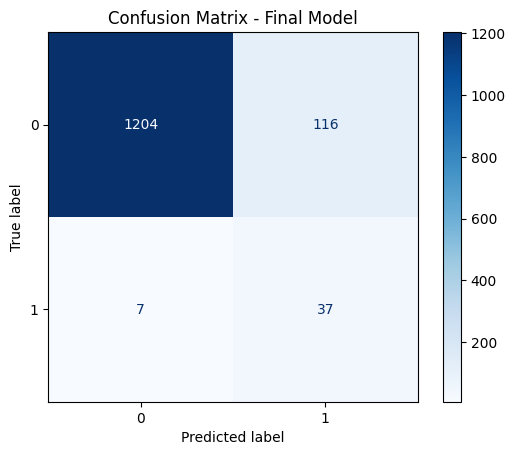

In [131]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix - Final Model')
plt.show()

# Model Interpreatation (Agnostic Method)

In [127]:
!pip install -q shap lime dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [128]:
# import dalex to explain complex model
import dalex as dx

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

In [132]:
# initiate explainer for XGBoost Model
model_xgb_exp = dx.Explainer(final_model, X_train_smote, y_train_smote, label = 'XGBoost Tuned Interpretationn')

Preparation of a new explainer is initiated

  -> data              : 10558 rows 29 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 10558 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Tuned Interpretationn
  -> predict function  : <function yhat_proba_default at 0x7d3eb17cbba0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 6.58e-06, mean = 0.537, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.0369, max = 0.0234
  -> model_info        : package xgboost

A new explainer has been created!


## Feature Importance

In [133]:
# visualize permuation feature importance
model_xgb_exp.model_parts().plot()

Variabel total debt/total net worth terbukti menjadi fitur yang paling penting, di mana pengacakan nilainya menyebabkan performa model menurun paling signifikan (peningkatan loss sebesar 0.029). Hasil ini mengonfirmasi bahwa faktor leverage atau solvabilitas adalah salah satu prediktor kunci dalam menentukan risiko kebangkrutan perusahaan.

## Partial Dependence Plot

In [134]:
# Partial Dependence Plot of XGB Model
model_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 29/29 [00:09<00:00,  2.93it/s]


In [135]:
top_10_features = [
    'total debt/total net worth',
    'persistent eps in the last four seasons',
    'borrowing dependency',
    'quick ratio',
    'net income to total assets',
    'operating profit per person',
    'quick assets/total assets',
    'total asset turnover',
    'long-term fund suitability ratio (a)',
    'total expense/assets'
]

# Partial Dependence Plot of XGB Model with top 10 features
model_xgb_exp.model_profile(variables=top_10_features).plot()

Calculating ceteris paribus: 100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


1. total debt/total net worth (Leverage)
    * Risiko kebangkrutan meningkat tajam saat rasio utang terhadap modal bersih naik dari 0% ke 1.5%. Setelah melewati 1.5%, risiko tetap sangat tinggi (di atas 60%).
2. persistent eps in the last four seasons (Profitabilitas)
    * Terdapat ambang batas tajam di sekitar nilai 0.2. Di atas nilai EPS ini, risiko bangkrut dianggap sangat rendah (sekitar 40%). Di bawah nilai ini, risiko melonjak signifikan (mendekati 60%).
3. net income to total assets (Profitabilitas)
    * Mirip dengan EPS, namun penurunannya lebih bertahap. Risiko mulai meningkat saat rasio laba bersih terhadap aset turun di bawah 0.8 dan menjadi sangat tinggi saat turun di bawah 0.7.
4. borrowing dependency (Leverage)
    * Ada "lompatan" risiko yang jelas di sekitar nilai 0.4. Perusahaan dengan tingkat ketergantungan pada pinjaman di atas 40% dianggap memiliki probabilitas bangkrut yang lebih tinggi (mendekati 60%) oleh model.

## Shapley Value

In [136]:
# final is already fit with X_train_smote and y_train_smote, namely `final_model`
explainer = shap.Explainer(final_model)
shap_values = explainer(X_test)
shap.initjs()

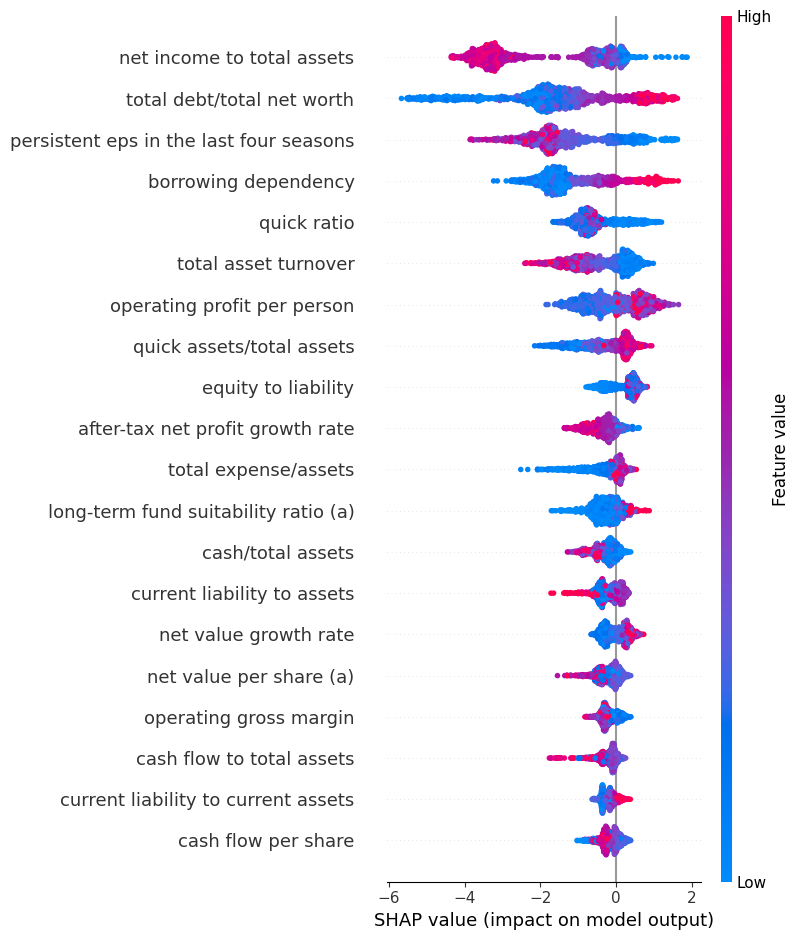

In [137]:
# global view of feature importance
shap.summary_plot(shap_values, X_test)

Ada beberapa hal yang perlu dilihat dari plot di atas
1. Sumbu-x: Dampak prediksi
    * Nilai Positif (`>0`): Mendorong prediksi ke arah bangkrut.
    * Nilai Negatif (`<0`): Mendorong prediksi ke arah tidak bangkrut.
2. Warna titik
    * Merah: Nilai fitur tinggi.
    * Biru: Nilai fitur rendah.

Jika dilihat dari grafik
* net income to total assets (Profitabilitas)
    * Titik-titik biru (nilai rendah) tersebar luas di sisi kanan (mendorong ke arah bangkrut), sementara titik merah (nilai tinggi) menumpuk di sisi kiri (mendorong ke arah tidak bangkrut).
    * Artinya profitabilitas yang tinggi adalah tanda kuat perusahaan sehat. Ini mengonfirmasi bahwa semakin tinggi profitabilitas, semakin berkurang potensi kebangkrutan sebuah perusahaan

* total debt/total net worth (Leverage)
    * Titik merah (nilai tinggi) tersebar di sisi kanan (mendorong ke arah bangkrut), dan titik biru (nilai rendah) menumpuk di sisi kiri (menjauhi kebangkrutan).
    * Tingkat utang yang tinggi secara konsisten diidentifikasi oleh model sebagai faktor risiko utama kebangkrutan. Ini juga mengkonfirmasi, bahwa semakin tinggi fitur ini, maka mendorong potensi kebangkrutan perusahaan

demikian dengan variabel lainnya